In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_and_normalize_data(filename):
    df = pd.read_csv(filename)
    data = df.values

    data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
    return data

In [3]:
def initialize_centroids(data, k):
    np.random.seed(42)
    return data[np.random.choice(data.shape[0], k, replace=False)]

In [4]:
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [5]:
def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

In [6]:
def k_means(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

In [7]:
def plot_clusters(data, labels, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'K-Means Clustering (k={k})')
    plt.show()

In [8]:
filename = 'kmeans.csv'
data = load_and_normalize_data(filename)

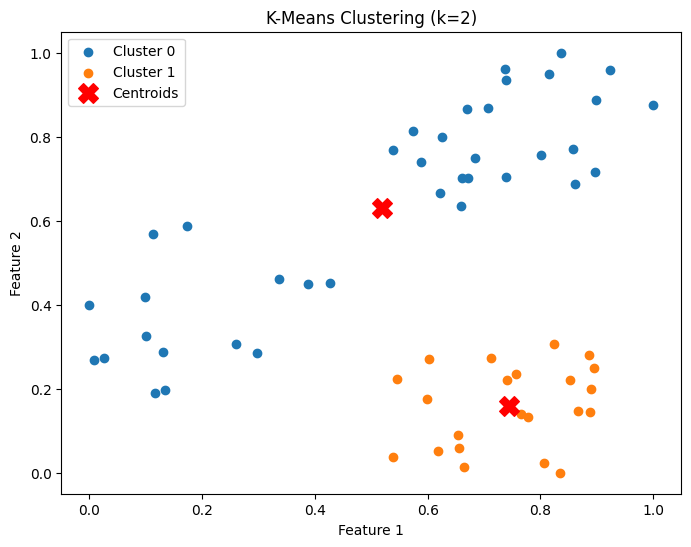

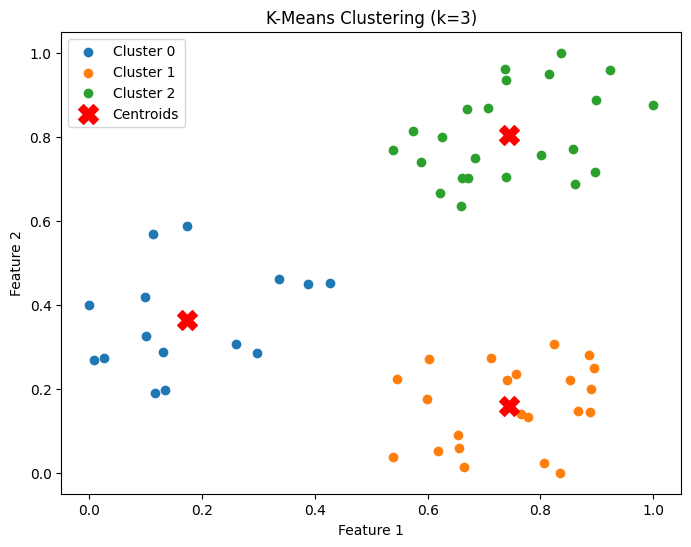

In [9]:
for k in [2, 3]:
    labels, centroids = k_means(data, k)
    plot_clusters(data, labels, centroids, k)